In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ARResults
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders

In [29]:
demand = pd.read_csv("Daily Demand Forecasting Orders.csv", index_col = 0)

In [30]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 1   Day of the week (Monday to Friday)                                  60 non-null     int64  
 2   Non-urgent order                                                    60 non-null     float64
 3   Urgent order                                                        60 non-null     float64
 4   Order type A                                                        60 non-null     float64
 5   Order type B                                                        60 non-null     float64
 6   Order type C                                                        60 non-null     float64
 7   Fiscal sector order

<AxesSubplot:>

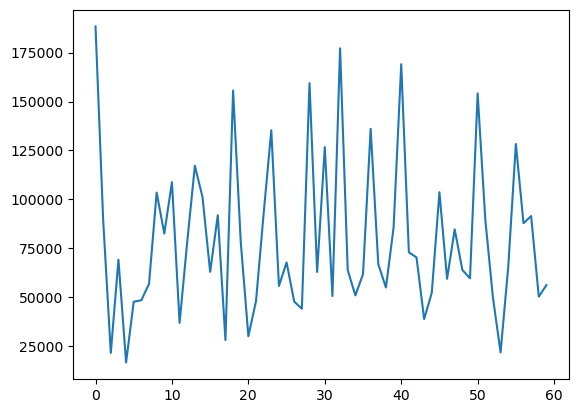

In [31]:
demand['Banking orders (2)'].plot()

## AR 모델링

In [32]:
model = AutoReg(demand['Banking orders (2)'], lags = 3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                     AutoReg(3)   Log Likelihood                -678.276
Method:               Conditional MLE   S.D. of innovations          35618.937
Date:                Mon, 12 Feb 2024   AIC                           1366.551
Time:                        13:02:12   BIC                           1376.766
Sample:                             3   HQIC                          1370.521
                                   60                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.232e+05   1.93e+04      6.387      0.000    8.54e+04    1.61e+05
Banking orders (2).L1    -0.1529      0.125     -1.222      0.222      -0.398       0.092
Banking orders (2).L2    -0.1290      0.125     -1.035      0.301      -0.373       0.115
Banking orders (2).L3    -0.2856      0.117     -2.435      0.015      -0.516      -0.056
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5517           -1.3953j            1.5004           -0.1901
AR.2            0.5517           +1.3953j            1.5004            0.1901
AR.3           -1.5552           -0.0000j            1.5552           -0.5000
-----------------------------------------------------------------------------
"""

In [36]:
arima_model = ARIMA(demand['Banking orders (2)'], order = (3, 0, 0))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -717.601
Date:                Mon, 12 Feb 2024   AIC                           1445.202
Time:                        13:02:47   BIC                           1455.674
Sample:                             0   HQIC                          1449.298
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.94e+04   3631.437     21.865      0.000    7.23e+04    8.65e+04
ar.L1         -0.1353      0.181     -0.746      0.456      -0.491       0.220
ar.L2         -0.2016      0.111     -1.810      0.070      -0.420       0.017
ar.L3         -0.3191      0.157     -2.033      0.042      -0.627      -0.011
sigma2       1.27e+09      0.022   5.65e+10      0.000    1.27e+09    1.27e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.12
Prob(Q):                              0.97   Prob(JB):                         0.08
Heteroskedasticity (H):               0.52   Skew:                             0.69
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.31e+26. Standard errors may be unstable.
"""

In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(arima_result.resid, lags=[10])

,lb_stat,lb_pvalue
10,7.436124,0.68373


<AxesSubplot:>

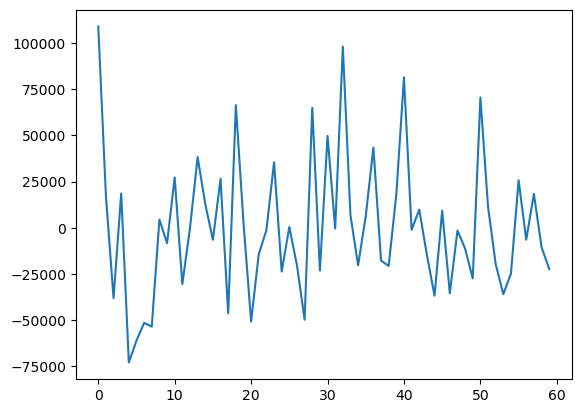

In [43]:
arima_result.resid.plot()

<AxesSubplot:>

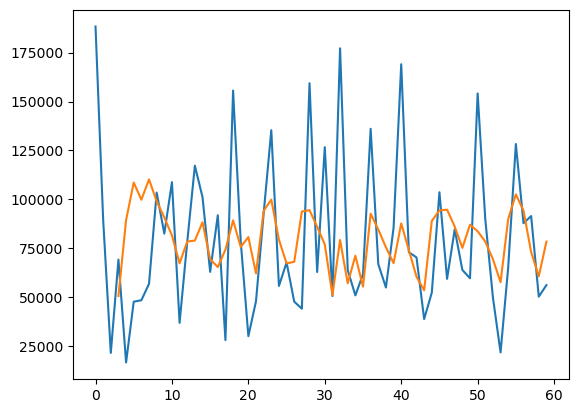

In [46]:
demand['Banking orders (2)'].plot()
arima_result.predict(3).plot()

In [99]:
ma_est1 = ARIMA(demand['Banking orders (2)'], order=(0, 0, 9), enforce_invertibility=False)

In [100]:
with ma_est1.fix_params({'ma.L1': 0, 'ma.L2': 0, 'ma.L4': 0, 'ma.L5': 0, 'ma.L6': 0, 'ma.L7': 0, 'ma.L8': 0}):
    ma_result = ma_est1.fit()

In [101]:
ma_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Banking orders (2)   No. Observations:                   60
Model:                 ARIMA(0, 0, 9)   Log Likelihood                -720.150
Date:                Mon, 12 Feb 2024   AIC                           1448.300
Time:                        14:18:18   BIC                           1456.677
Sample:                             0   HQIC                          1451.577
                                 - 60                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.94e+04   2085.761     38.068      0.000    7.53e+04    8.35e+04
ma.L1 (fixed)          0        nan        nan        nan         nan         nan
ma.L2 (fixed)          0        nan        nan        nan         nan         nan
ma.L3            -0.4838      0.111     -4.373      0.000      -0.701      -0.267
ma.L4 (fixed)          0        nan        nan        nan         nan         nan
ma.L5 (fixed)          0        nan        nan        nan         nan         nan
ma.L6 (fixed)          0        nan        nan        nan         nan         nan
ma.L7 (fixed)          0        nan        nan        nan         nan         nan
ma.L8 (fixed)          0        nan        nan        nan         nan         nan
ma.L9            -0.0093      0.093     -0.101      0.920      -0.191       0.172
sigma2          9.33e+08      0.011   8.15e+10      0.000    9.33e+08    9.33e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.35   Prob(JB):                         0.17
Heteroskedasticity (H):               0.55   Skew:                             0.59
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.31e+27. Standard errors may be unstable.
"""

## auto.arima

In [102]:
import pmdarima

In [109]:
auto_arima_model = pmdarima.auto_arima(demand['Banking orders (2)'], max_p=3, max_q =9, stepwise  = False)

In [110]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -717.683
Date:                Mon, 12 Feb 2024   AIC                           1445.366
Time:                        14:51:46   BIC                           1455.838
Sample:                             0   HQIC                          1449.463
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.232e+05   1.96e+04      6.299      0.000    8.49e+04    1.62e+05
ar.L1         -0.1044      0.184     -0.566      0.571      -0.466       0.257
ar.L2         -0.1707      0.111     -1.536      0.124      -0.389       0.047
ar.L3         -0.2882      0.160     -1.797      0.072      -0.603       0.026
sigma2      1.269e+09      0.136   9.32e+09      0.000    1.27e+09    1.27e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 6.26
Prob(Q):                              0.79   Prob(JB):                         0.04
Heteroskedasticity (H):               0.54   Skew:                             0.77
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.34e+26. Standard errors may be unstable.
"""

## VAR

In [111]:
from statsmodels.tsa.api import VAR

In [112]:
demand_dataset = demand[['Banking orders (2)','Banking orders (3)']]

In [113]:
for i in [1,2,3,4]:
    model = VAR(demand_dataset)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()
    

Order = 1
AIC:  39.74600087701911
BIC:  39.9572758713146

Order = 2
AIC:  39.64790282811112
BIC:  40.00315162303292

Order = 3
AIC:  39.5592635674461
BIC:  40.06106563323003

Order = 4
AIC:  39.68281445449618
BIC:  40.33382035508962



In [115]:
# AIC가 제일 작은 3차수 선택
var_model = VAR(demand_dataset)
var_result = var_model.fit(3)

In [116]:
var_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Feb, 2024
Time:                     15:16:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    40.0611
Nobs:                     57.0000    HQIC:                   39.7543
Log likelihood:          -1275.20    FPE:                1.51863e+17
AIC:                      39.5593    Det(Omega_mle):     1.20460e+17
--------------------------------------------------------------------
Results for equation Banking orders (2)
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                    105571.655461     21520.760950            4.906           0.000
L1.Banking orders (2)        -0.213435         0.129296           -1.651           0.099
L1.Banking orde

In [120]:
var_result.test_whiteness(nlags=8, signif=0.05, adjusted=False).summary()

Test statistic,Critical value,p-value,df
20.46,31.41,0.429,20
